# seaborn_exercises

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data

import seaborn as sns

Use the iris database to answer the following quesitons:

In [50]:
# Loading built-in Datasets:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


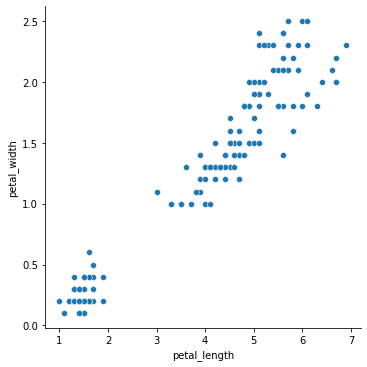

In [51]:
#1 What does the distribution of petal lengths look like?

sns.relplot(x='petal_length', y='petal_width', data=iris)

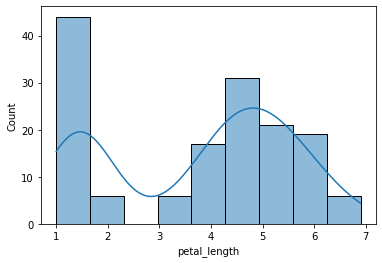

In [52]:
#1 What does the distribution of petal lengths look like?
sns.histplot(iris.petal_length, kde=True)
plt.show()

/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


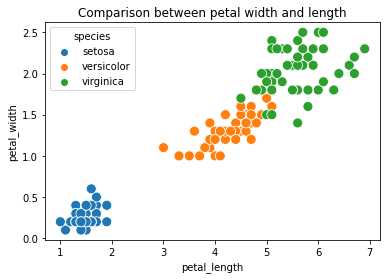

In [53]:
#2 Is there a correlation between petal length and petal width?

plt.title('Comparison between petal width and length')
sns.scatterplot(iris['petal_length'], iris['petal_width'], hue = iris['species'], s= 100);

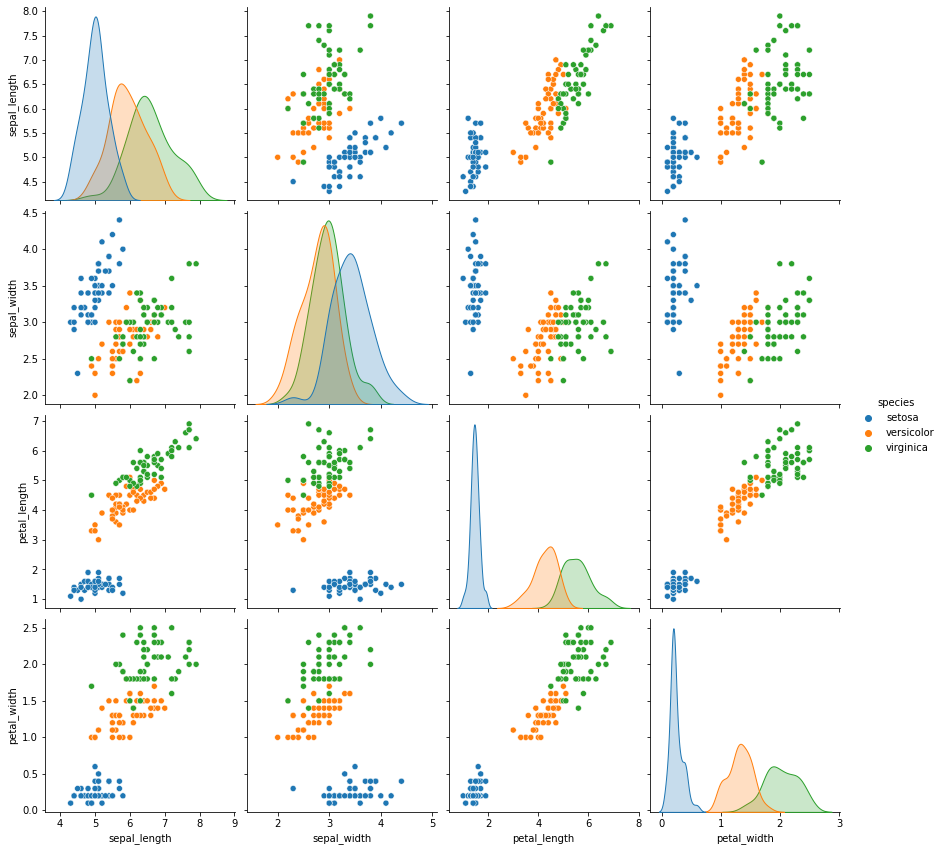

In [54]:
#3 Would it be reasonable to predict species based on sepal width and sepal length?

sns.pairplot(iris,hue="species",height=3);

<AxesSubplot:>

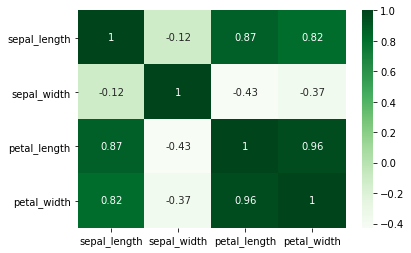

In [55]:

sns.heatmap(iris.corr(), cmap='Greens', annot = True)

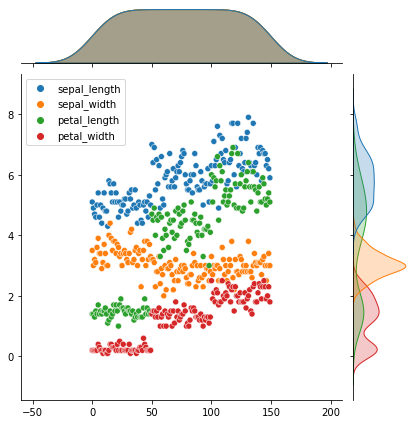

In [56]:
#4 Which features would be best used to predict species?
sns.jointplot(data=iris)

In [57]:
# 1 Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. 
#Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. 
# What do you notice?

anscombe = sns.load_dataset('anscombe')

anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [58]:
anscombe.groupby('dataset').sum()

,x,y
dataset,,
I,99.0,82.51
II,99.0,82.51
III,99.0,82.50
IV,99.0,82.51


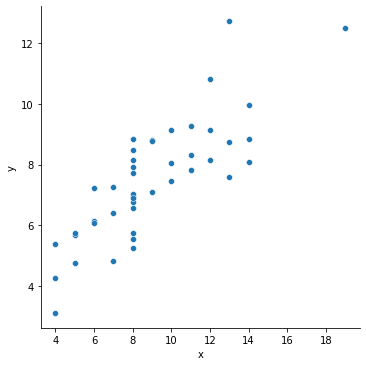

In [59]:
# Plot the x and y values from the anscombe data. Each dataset should be in a separate column.

sns.relplot(x='x', y='y', data=anscombe)

/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x', ylabel='y'>

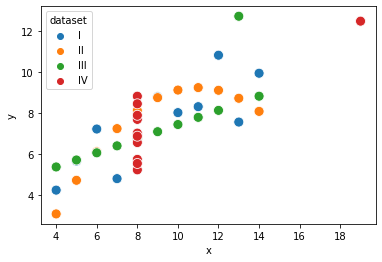

In [60]:
sns.scatterplot(anscombe['x'], anscombe['y'], hue = anscombe['dataset'], s= 100)

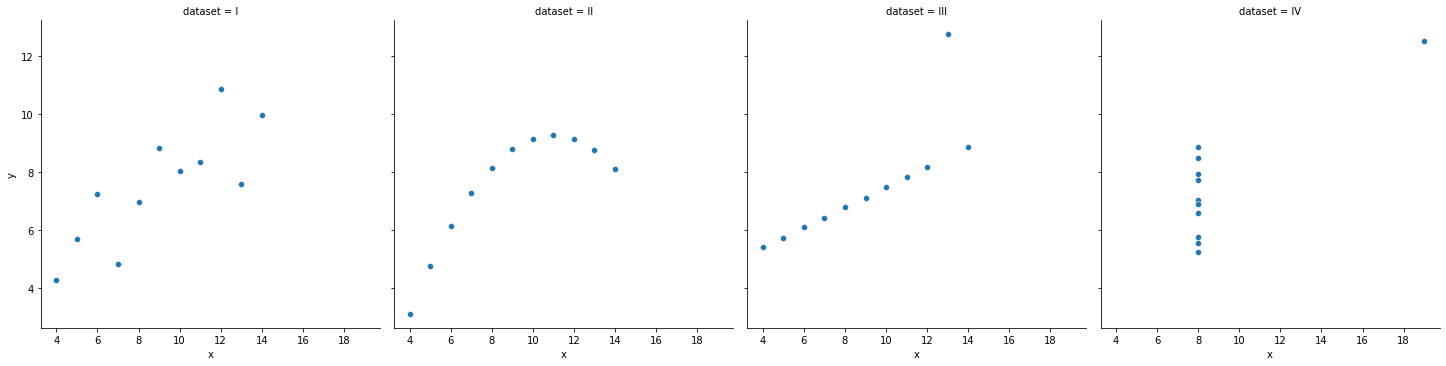

In [61]:
sns.relplot(x="x", y="y",col="dataset",data=anscombe)

In [69]:
# 2 Load the InsectSprays dataset and read it's documentation. 
#Create a boxplot that shows the effectiveness of the different insect sprays.

insect_sprays = data("InsectSprays")
insect_sprays = data("InsectSprays",show_doc=True)

InsectSprays

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Effectiveness of Insect Sprays

### Description

The counts of insects in agricultural experimental units treated with
different insecticides.

### Usage

    InsectSprays

### Format

A data frame with 72 observations on 2 variables.

[,1]

count

numeric

Insect count

[,2]

spray

factor

The type of spray

### Source

Beall, G., (1942) The Transformation of data from entomological field
experiments, _Biometrika_, **29**, 243–262.

### References

McNeil, D. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(stats); require(graphics)
    boxplot(count ~ spray, data = InsectSprays,
            xlab = "Type of spray", ylab = "Insect count",
            main = "InsectSprays data", varwidth = TRUE, col = "lightgray")
    fm1 <- aov(count ~ spray, data = InsectSprays)
    summary(fm1)
    opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
    plot(fm1)
 

<AxesSubplot:xlabel='spray', ylabel='count'>

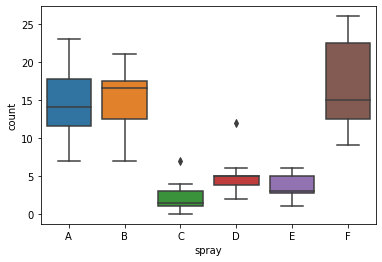

In [104]:
sns.boxplot(data=insect_sprays,y="count",x="spray")

In [67]:
from pydataset import data
swiss = data("swiss")
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


In [95]:
# Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. 
swiss["is_catholic"] = swiss["Catholic"] > swiss["Catholic"].mean()
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Courtelary,80.2,17.0,15,12,9.96,22.2,False
Delemont,83.1,45.1,6,9,84.84,22.2,True
Franches-Mnt,92.5,39.7,5,5,93.40,20.2,True
Moutier,85.8,36.5,12,7,33.77,20.3,False
Neuveville,76.9,43.5,17,15,5.16,20.6,False


<AxesSubplot:xlabel='Fertility', ylabel='is_catholic'>

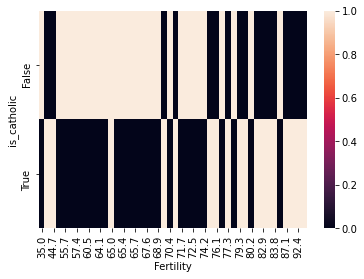

In [82]:
# Does whether or not a province is Catholic influence fertility?

cath_fert = pd.crosstab(swiss["is_catholic"],swiss["Fertility"])
sns.heatmap(cath_fert)

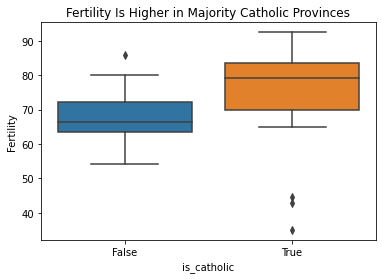

In [113]:
#example code
# Does whether or not a province is Catholic influence fertility?
sns.boxplot(data=swiss, x="is_catholic", y="Fertility")
plt.title("Fertility Is Higher in Majority Catholic Provinces")
plt.show()

In [96]:
# What measure correlates most strongly with fertility?

<AxesSubplot:>

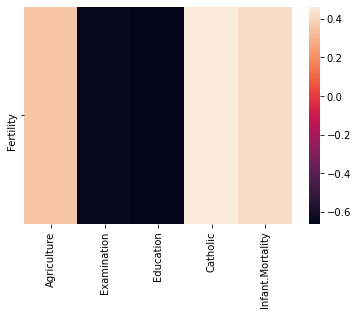

In [99]:
correlation_swiss = swiss.corr()
correlation_swiss = correlation_swiss.drop(columns=["Fertility","is_catholic"])
correlation_swiss = correlation_swiss.head(1)
sns.heatmap(correlation_swiss)

In [114]:
# example code
# Our eyes can deceive us, so let's check the numbers!
swiss.corr().Fertility

Fertility           1.000000
Agriculture         0.353079
Examination        -0.645883
Education          -0.663789
Catholic            0.463685
Infant.Mortality    0.416556
is_catholic         0.275720
Name: Fertility, dtype: float64

In [ ]:
#Using the chipotle dataset from the previous exercise, 
#create a bar chart that shows the 4 most popular items and the revenue produced by each.

In [88]:
def get_db_url(u,p,h,d):
    url = f'mysql+pymysql://{user}:{password}@{host}/{d}'
    return url

from env import host, user, password

host = host
user = user
password = password

chipotle_url = get_db_url(user,password,host,"chipotle")
chipotle_url
chipotle = pd.read_sql('SELECT * FROM orders', chipotle_url)

chipotle.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


In [89]:
chipotle.item_price = chipotle.item_price.str.replace("$","").astype(float)

<ipython-input-89-750123063097>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  chipotle.item_price = chipotle.item_price.str.replace("$","").astype(float)


In [90]:
chipotle.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,2.39
1,2,1,1,Izze,[Clementine],3.39
2,3,1,1,Nantucket Nectar,[Apple],3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",16.98


In [93]:
most_popular = chipotle.groupby("item_name").agg({"id":"count","item_price":"sum"})

most_popular.sort_values(by="id",ascending=False).head(4)

,id,item_price
item_name,,
Chicken Bowl,726,7342.73
Chicken Burrito,553,5575.82
Chips and Guacamole,479,2201.04
Steak Burrito,368,3851.43


<AxesSubplot:xlabel='id', ylabel='item_price'>

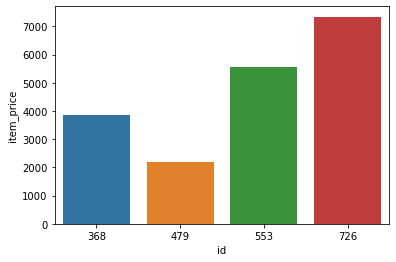

In [94]:
top_4_items = most_orders.sort_values(by="id",ascending=False).head(4)

sns.barplot(x="id",y="item_price",data=top_4_items)

In [110]:
# Load the sleepstudy data and read it's documentation. 
#Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.

sleepstudy = data("sleepstudy")

sleepstudy = data("sleepstudy",show_doc=True)

sleepstudy

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Reaction times in a sleep deprivation study

### Description

The average reaction time per day for subjects in a sleep deprivation study.
On day 0 the subjects had their normal amount of sleep. Starting that night
they were restricted to 3 hours of sleep per night. The observations represent
the average reaction time on a series of tests given each day to each subject.

### Format

A data frame with 180 observations on the following 3 variables.

`Reaction`

Average reaction time (ms)

`Days`

Number of days of sleep deprivation

`Subject`

Subject number on which the observation was made.

### Details

These data are from the study described in Belenky et al. (2003), for the
sleep-deprived group and for the first 10 days of the study, up to the
recovery period.

### References

Gregory Belenky, Nancy J. Wesensten, David R. Thorne, Maria L. Thomas, Helen
C. Sing, Daniel P. Redmond, 

In [111]:
sleepstudy = data("sleepstudy")
sleepstudy.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


<AxesSubplot:xlabel='Days', ylabel='Reaction'>

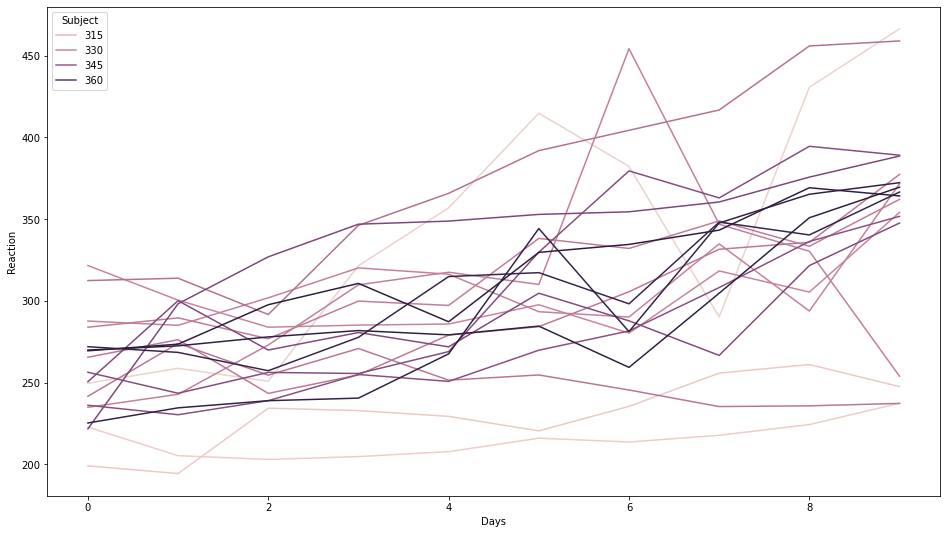

In [118]:
sns.set_palette("colorblind")

plt.figure(figsize=(16, 9))
sns.lineplot(x="Days", y="Reaction", hue="Subject", data=sleepstudy)
